In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.databases import Postgresql 

# Acessar dados

In [3]:
query = """ SELECT * FROM ficha_tecnicav1;"""

bd = Postgresql(user='postgres' , password='bruno22#' , host= 'localhost', port= '5432', database = 'brunods')
dataset = bd.retrieve_data(query=query)
dataset.head(3)

Buscando os dados!!!
Conexão com Postgresql fechada


,sku,tipo,uva,country,region,vinicola,teor_alcoolico,amadurecimento,classificacao,safra,visual,ofativo,gustativo,temperatura,potencial_guarda
0,11549,Branco,Furmint (100.00%),Hungria,Tokaj,Pajzos,11.00% ABV,Sem passagem por carvalho.,Suave/Doce,2003,Amarelo dourado,"Frutas brancas maduras, mel, figo seco, frutas...","Doce, equilibrado, acidez agradável, final longo",10 °C,20 anos
1,12390,Branco,Sauvignon Blanc,França,Languedoc-Roussillon,Baron Philippe de Rothschild,12.00% ABV,Em tanques de aço inox.,Seco,2018,Amarelo claro,"Notas de frutas cítricas, lima, limão","Fresco, frutado e boa acidez",10 °C,3 anos
2,12733,Tinto,Tempranillo,Espanha,Ribera del Júcar,La Magdalena,14.50% ABV,4 meses em barricas de carvalho francês e amer...,Seco,2017,Rubi intenso com reflexos violáceos,"Frutas vermelhas maduras, especiarias e um lev...","Saboroso, taninos macios e final persistente",16 °C,5 anos


# Pré Limpeza

In [4]:
dataset['potencial_guarda'] = dataset['potencial_guarda'].apply(lambda x: x.replace('anos',''))
dataset['potencial_guarda'] = dataset['potencial_guarda'].astype('int')
dataset['temperatura'] = dataset['temperatura'].apply(lambda x: x.replace('°C',''))
dataset['temperatura'] = dataset['temperatura'].astype('int')
dataset['teor_alcoolico'] = dataset['teor_alcoolico'].apply(lambda x: x.replace('% ABV',''))
dataset['teor_alcoolico'] = dataset['teor_alcoolico'].astype('float')

In [5]:
dataset.head(10)

,sku,tipo,uva,country,region,vinicola,teor_alcoolico,amadurecimento,classificacao,safra,visual,ofativo,gustativo,temperatura,potencial_guarda
0,11549,Branco,Furmint (100.00%),Hungria,Tokaj,Pajzos,11.0,Sem passagem por carvalho.,Suave/Doce,2003,Amarelo dourado,"Frutas brancas maduras, mel, figo seco, frutas...","Doce, equilibrado, acidez agradável, final longo",10,20
1,12390,Branco,Sauvignon Blanc,França,Languedoc-Roussillon,Baron Philippe de Rothschild,12.0,Em tanques de aço inox.,Seco,2018,Amarelo claro,"Notas de frutas cítricas, lima, limão","Fresco, frutado e boa acidez",10,3
2,12733,Tinto,Tempranillo,Espanha,Ribera del Júcar,La Magdalena,14.5,4 meses em barricas de carvalho francês e amer...,Seco,2017,Rubi intenso com reflexos violáceos,"Frutas vermelhas maduras, especiarias e um lev...","Saboroso, taninos macios e final persistente",16,5
3,12734,Branco,Chardonnay (100%),Chile,Valle Central,Casas del Toqui,13.5,Em tanques de aço inox.,Seco,2019,Amarelo com reflexos esverdeados,"Abacaxi, maracujá, mineral","Corpo de leve para médio, boa acidez, agradáve...",8,3
4,12813,Tinto,"Merlot (90.00%), Cabernet Sauvignon (7.00%), C...",França,Pomerol,Château Gazin,14.5,Em barricas de carvalho.,Seco,2010,Rubi,"Ameixa, cereja preta, alcaçuz, notas de especi...","Complexo, elegante, macio, equilibrado, com bo...",15,10
5,12877,Tinto,"Cabernet Sauvignon (87.00%), Merlot (10.00%), ...",França,Margaux,Château Margaux,13.0,Aproximadamente 24 meses em barricas de carval...,Seco,2008,Rubi profundo e brilhante,"Flores como violeta e rosa, groselha, framboes...",As frutas dominam o paladar e mesclam-se às no...,16,30
6,12880,Tinto,"Cabernet Franc (8.00%), Cabernet Sauvignon (68...",França,Pauillac,Château Mouton Rothschild,13.5,"Em barricas de carvalho, 60% novas.",Seco,2010,Rubi profundo e brilhante,"Rico e complexo, com frutas como amoras, mirti...","Seco, com ótima intensidade no paladar, muita ...",16,22
7,12883,Tinto,"Cabernet Sauvignon (44.00%), Merlot (43.00%), ...",França,Pessac-Léognan,Domaine Clarence Dillon,13.0,22 meses em barricas novas de carvalho francês.,Seco,2007,Vermelho rubi intenso,"Complexo, com notas de framboesas, cerejas, vi...","Tem bom corpo, acidez agradável, estrutura fir...",16,20
8,12884,Tinto,"Merlot (52.00%), Cabernet Sauvignon (36.00%), ...",França,Pessac-Léognan,Domaine Clarence Dillon,14.5,16 a 20 meses em barricas de carvalho francês,Seco,2010,Rubi intenso,"Mirtilo, amora, picante, mineral, terroso, cacau","Estruturado, boa densidade, taninos presentes,...",16,20
9,12894,Tinto,"Merlot (90.00%), Cabernet Sauvignon (7.00%), C...",França,Pomerol,Château Gazin,14.5,"18 meses em barricas de carvalho, sendo 50% no...",Seco,2009,Rubi,"Cereja preta, baunilha, brioche, floral, alcaç...","Aveludado, equilibrado, fresco, taninos presentes",16,25


In [6]:
#Temperatura
unic = dataset['temperatura'].unique()
unic.sort()
print(unic)

def temp_cat(x):
    if x <= 9:
        return 'baixa_temperatura'
    elif 9 < x < 15:
        return 'media_temperatura'
    elif x >= 15:
        return 'alta_temperatura'
    
dataset['temperatura'] = dataset['temperatura'].apply(temp_cat) 

[ 7  8  9 10 12 14 15 16 17 18]


In [7]:
#Potencial Guarda
g_unic = dataset['potencial_guarda'].unique()
g_unic.sort()
print(g_unic)


def guard_cat(x):
    if x <= 5:
        return 'consumo_rapido'
    elif x > 5:
        return 'vinho_guarda'

dataset['potencial_guarda'] = dataset['potencial_guarda'].apply(guard_cat) 

[ 2  3  4  5  6  7  8  9 10 11 12 13 15 16 18 20 22 23 25 30 40 50]


In [8]:
#Safra

def cat_safra(x):
    if (x['country'] == 'França') & (x['region'] =='Champagne') & (x['safra'] == '2004'):
        return 1
    
    elif (x['country'] == 'França') & (x['region'] =='Champagne') & (x['safra'] == '1998'):
        return 1
    
    elif (x['country'] == 'Itália') & (x['region'] =='Piemonte') & (x['safra'] == '2010'):
        return 1
    
    else:
        return 0
    
dataset['cat_safra'] = dataset.apply(cat_safra, axis=1)

In [9]:
#teor alcoolico
alcool = dataset.teor_alcoolico.unique()
alcool.sort()
print(alcool)

def alcool_cat(x):
    if x <= 12.:
        return 'teor_baixo'
    elif 12. < x <= 14.:
        return 'teor_medio'
    elif x > 14.:
        return 'teor_alto'

dataset['teor_cat'] = dataset['teor_alcoolico'].apply(alcool_cat)

[ 5.5  9.   9.8 10.5 11.  12.  12.5 13.  13.2 13.3 13.5 13.6 13.7 13.8
 13.9 14.  14.1 14.2 14.3 14.5 15.  15.1 15.5 16.  18. ]


In [10]:
#Amadurecimento
dataset['barris_carvalho'] = dataset['amadurecimento'].str.contains('barricas de carvalho|barricas|barricas de carvalho.|carvalho', regex= True)
dataset['inox'] = dataset['amadurecimento'].str.contains('tanques de aço inox | inox', regex= True)
dataset['metodo_tradicional'] = dataset['amadurecimento'].str.contains('Método Champenoise', regex= True)
dataset['garrafas'] = dataset['amadurecimento'].str.contains('garrafas | garrafa', regex= True)
dataset['concreto'] = dataset['amadurecimento'].str.contains('concreto', regex= True)

In [22]:
#gustativo
dataset[['gustativo1','gustativo2','gustativo3','gustativo4','gustativo5','gustativo6','gustativo7']] = dataset['gustativo'].str.split(',', expand = True)
dataset.drop(['gustativo3','gustativo4','gustativo5','gustativo6','gustativo7'], axis=1, inplace=True)

In [23]:
dataset.shape

(453, 24)

# Salvando trabalho intermediario na base de dados

In [24]:
query = """ CREATE TABLE ficha_tecnica_temp ( sku TEXT,
                                            tipo               TEXT,
                                            uva                TEXT,
                                            country            TEXT,
                                            region             TEXT,
                                            vinicola           TEXT,
                                            teor_alcoolico     TEXT,
                                            amadurecimento     TEXT,
                                            classificacao      TEXT,
                                            safra              TEXT,
                                            visual             TEXT,
                                            ofativo            TEXT,
                                            gustativo          TEXT,
                                            temperatura        TEXT,
                                            potencial_guarda   TEXT,
                                            cat_safra          TEXT,
                                            teor_cat           TEXT,
                                            barris_carvalho    TEXT,
                                            inox               TEXT,
                                            metodo_tradicional  TEXT,
                                            garrafas           TEXT,
                                            concreto           TEXT,
                                            gustativo1         TEXT,
                                            gustativo2         TEXT)  """



bd = Postgresql(user='postgres' , password='bruno22#' , host= 'localhost', port= '5432', database = 'brunods')
bd.create_table(query=query)
bd.insert_data(df = dataset, tabela = ' ficha_tecnica_temp')

Tabela criada no postgresql com sucesso 
Conexão com Postgresql fechada
Conexão com Postgresql fechada


# Trabalhando as variaveis gustativo, ofativo e visual

In [25]:
query = """ SELECT distinct sku, gustativo FROM var_gustativo;"""
query1 = """SELECT distinct sku, visual FROM var_visual;"""
query2 = """SELECT distinct sku, ofativo FROM var_ofativo;"""

bd = Postgresql(user='postgres' , password='bruno22#' , host= 'localhost', port= '5432', database = 'brunods')
var_gustativo= bd.retrieve_data(query=query)
var_visual=    bd.retrieve_data(query=query1)
var_ofativo=   bd.retrieve_data(query=query2)

Buscando os dados!!!
Conexão com Postgresql fechada
Buscando os dados!!!
Conexão com Postgresql fechada
Buscando os dados!!!
Conexão com Postgresql fechada


In [26]:
# Dropar gustativo,gustativo1 e 2 e visual
dataset.drop(['ofativo','amadurecimento','gustativo', 'gustativo1', 'gustativo2', 'visual'], axis=1, inplace=True)
dataset.head(15)

,sku,tipo,uva,country,region,vinicola,teor_alcoolico,classificacao,safra,temperatura,potencial_guarda,cat_safra,teor_cat,barris_carvalho,inox,metodo_tradicional,garrafas,concreto
0,11549,Branco,Furmint (100.00%),Hungria,Tokaj,Pajzos,11.0,Suave/Doce,2003,media_temperatura,vinho_guarda,0,teor_baixo,True,False,False,False,False
1,12390,Branco,Sauvignon Blanc,França,Languedoc-Roussillon,Baron Philippe de Rothschild,12.0,Seco,2018,media_temperatura,consumo_rapido,0,teor_baixo,False,True,False,False,False
2,12733,Tinto,Tempranillo,Espanha,Ribera del Júcar,La Magdalena,14.5,Seco,2017,alta_temperatura,consumo_rapido,0,teor_alto,True,False,False,False,False
3,12734,Branco,Chardonnay (100%),Chile,Valle Central,Casas del Toqui,13.5,Seco,2019,baixa_temperatura,consumo_rapido,0,teor_medio,False,True,False,False,False
4,12813,Tinto,"Merlot (90.00%), Cabernet Sauvignon (7.00%), C...",França,Pomerol,Château Gazin,14.5,Seco,2010,alta_temperatura,vinho_guarda,0,teor_alto,True,False,False,False,False
5,12877,Tinto,"Cabernet Sauvignon (87.00%), Merlot (10.00%), ...",França,Margaux,Château Margaux,13.0,Seco,2008,alta_temperatura,vinho_guarda,0,teor_medio,True,False,False,False,False
6,12880,Tinto,"Cabernet Franc (8.00%), Cabernet Sauvignon (68...",França,Pauillac,Château Mouton Rothschild,13.5,Seco,2010,alta_temperatura,vinho_guarda,0,teor_medio,True,False,False,False,False
7,12883,Tinto,"Cabernet Sauvignon (44.00%), Merlot (43.00%), ...",França,Pessac-Léognan,Domaine Clarence Dillon,13.0,Seco,2007,alta_temperatura,vinho_guarda,0,teor_medio,True,False,False,False,False
8,12884,Tinto,"Merlot (52.00%), Cabernet Sauvignon (36.00%), ...",França,Pessac-Léognan,Domaine Clarence Dillon,14.5,Seco,2010,alta_temperatura,vinho_guarda,0,teor_alto,True,False,False,False,False
9,12894,Tinto,"Merlot (90.00%), Cabernet Sauvignon (7.00%), C...",França,Pomerol,Château Gazin,14.5,Seco,2009,alta_temperatura,vinho_guarda,0,teor_alto,True,False,False,False,False


In [27]:
dataset.shape

(453, 18)

In [28]:
# Mesclar gustativo e visual novos
dataset = pd.merge(dataset,var_gustativo, left_on='sku', right_on='sku', how='left')

In [29]:
dataset.shape

(453, 19)

In [30]:
dataset = pd.merge(dataset, var_visual,left_on='sku', right_on='sku', how='left')

In [31]:
dataset.shape

(453, 20)

In [32]:
dataset = pd.merge(dataset, var_ofativo,left_on='sku', right_on='sku', how='left')

In [33]:
dataset.shape

(453, 21)

In [34]:
#base até o momento.
dataset.head(5)

,sku,tipo,uva,country,region,vinicola,teor_alcoolico,classificacao,safra,temperatura,...,cat_safra,teor_cat,barris_carvalho,inox,metodo_tradicional,garrafas,concreto,gustativo,visual,ofativo
0,11549,Branco,Furmint (100.00%),Hungria,Tokaj,Pajzos,11.0,Suave/Doce,2003,media_temperatura,...,0,teor_baixo,True,False,False,False,False,Acidez,Amarelo,outros
1,12390,Branco,Sauvignon Blanc,França,Languedoc-Roussillon,Baron Philippe de Rothschild,12.0,Seco,2018,media_temperatura,...,0,teor_baixo,False,True,False,False,False,Acidez,Amarelo,outros
2,12733,Tinto,Tempranillo,Espanha,Ribera del Júcar,La Magdalena,14.5,Seco,2017,alta_temperatura,...,0,teor_alto,True,False,False,False,False,outros,Rubi,outros
3,12734,Branco,Chardonnay (100%),Chile,Valle Central,Casas del Toqui,13.5,Seco,2019,baixa_temperatura,...,0,teor_medio,False,True,False,False,False,Acidez,Amarelo,outros
4,12813,Tinto,"Merlot (90.00%), Cabernet Sauvignon (7.00%), C...",França,Pomerol,Château Gazin,14.5,Seco,2010,alta_temperatura,...,0,teor_alto,True,False,False,False,False,outros,Rubi,aroma_madeirado


# Salvando trabalho intermediario na base de dados

In [35]:
# Salvando a base intermediaria
query = """ CREATE TABLE ficha_tecnica_temp1 ( sku TEXT,
                                            tipo               TEXT,
                                            uva                TEXT,
                                            country            TEXT,
                                            region             TEXT,
                                            vinicola           TEXT,
                                            teor_alcoolico     TEXT,
                                            classificacao      TEXT,
                                            safra              TEXT,
                                            temperatura        TEXT,
                                            potencial_guarda   TEXT,
                                            cat_safra          TEXT,
                                            teor_cat           TEXT,
                                            barris_carvalho    TEXT,
                                            inox               TEXT,
                                            metodo_tradicional  TEXT,
                                            garrafas           TEXT,
                                            concreto           TEXT,
                                            gustativo          TEXT,
                                            visual             TEXT,
                                            ofativo            TEXT)  """



bd = Postgresql(user='postgres' , password='bruno22#' , host= 'localhost', port= '5432', database = 'brunods')
bd.create_table(query=query)
bd.insert_data(df = dataset, tabela = ' ficha_tecnica_temp1')

Tabela criada no postgresql com sucesso 
Conexão com Postgresql fechada
Conexão com Postgresql fechada


# Trabalhando com o comentario do sommelier

In [36]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MaxAbsScaler
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 

query = """ SELECT sku, comments  FROM comments_sommelier;"""
bd = Postgresql(user='postgres' , password='bruno22#' , host= 'localhost', port= '5432', database = 'brunods')
var_comments= bd.retrieve_data(query=query)

Buscando os dados!!!
Conexão com Postgresql fechada


In [37]:
var_comments.comments = var_comments.comments.str.strip('\n')
var_comments.head()

,sku,comments
0,18479,"Rosé francês frutado, leve, fresco e com doçur..."
1,3170,"Com notas de frutas brancas, mel, pão e fermen..."
2,22807,Pinot Noir da Borgonha com aromas de frutas c...
3,22698,"Um dos mais nobres champagnes do mundo, o Moët..."
4,22696,O primeiro champagne para ser apreciado com ge...


In [38]:
transformer = CountVectorizer(analyzer = 'word',min_df=3, stop_words=['de','e','a','i','o','u', 'A','As','Com', 'no','na','são', 'as','com','os','do','que','da','das','este','em','entre', 'para','esse', 'um','uma','em','trata', 'trata se','se'], ngram_range=(4,4))
bag_of_words = transformer.fit_transform(var_comments.comments)
bag_of_words.shape

(576, 181)

In [39]:
for k in range(2,10):
    cluster = make_pipeline(MaxAbsScaler(),  KMeans(n_clusters=k, random_state=0))
    cluster.fit(bag_of_words)
    p=cluster.predict(bag_of_words)
    
    sil = silhouette_score(bag_of_words, p)
    print(f"k = {k} - Silhoutte: {sil}")

k = 2 - Silhoutte: 0.8611266132747402
k = 3 - Silhoutte: 0.8554812375846519
k = 4 - Silhoutte: 0.6349436964301512
k = 5 - Silhoutte: 0.72484441839819
k = 6 - Silhoutte: 0.7238106840144556
k = 7 - Silhoutte: 0.7321035325037276
k = 8 - Silhoutte: 0.652843384692555
k = 9 - Silhoutte: 0.6659565932576881


In [40]:
terms = transformer.get_feature_names()
k=2
cluster = make_pipeline(MaxAbsScaler(),  KMeans(n_clusters=k, random_state=0))
cluster.fit(bag_of_words)
p = cluster.predict(bag_of_words)

for c in np.unique(p):
    print(f'\nCluster {c} - Size {(p == c).sum()}')
    rank = pd.Series(np.array(bag_of_words[p==c].mean(axis=0)).squeeze(), index=terms).sort_values().tail(20)
    print(rank)


Cluster 0 - Size 573
elaborado uva tinta mais             0.006981
premier grand cru classé             0.008726
tinto aromas frutas vermelhas        0.008726
metros acima nível mar               0.008726
prova vinhos brasil 2016             0.008726
amadurecimento tanques aço inox      0.008726
também pode ser encontrada           0.008726
passagem por barricas carvalho       0.008726
frutado boa presença boca            0.008726
grande prova vinhos brasil           0.010471
87 pontos guia adega                 0.010471
elaborado pelo método charmat        0.010471
meses barricas carvalho francês      0.010471
pode ser degustado sozinho           0.010471
degustado sozinho ou harmonizado     0.012216
ser degustado sozinho ou             0.012216
elaborado pelo método tradicional    0.013962
pontuado por robert parker           0.015707
guia adega vinhos brasil             0.024433
pontos guia adega vinhos             0.024433
dtype: float64

Cluster 1 - Size 3
parcela selecionada ind

In [43]:
# coletando variavel tratada
query = """ SELECT distinct sku, comments_label  FROM comments_var;"""
bd = Postgresql(user='postgres' , password='bruno22#' , host= 'localhost', port= '5432', database = 'brunods')
comments_var= bd.retrieve_data(query=query)

Buscando os dados!!!
Conexão com Postgresql fechada


In [44]:
#merge
dataset = pd.merge(dataset,comments_var, left_on='sku', right_on='sku', how='left')

In [45]:
#shape
dataset.shape

(453, 22)

# Tipo Uva

In [52]:
#destaque da variavel
var_uva = dataset.loc[:,['sku','uva']]
var_uva.head()

,sku,uva
0,11549,Furmint (100.00%)
1,12390,Sauvignon Blanc
2,12733,Tempranillo
3,12734,Chardonnay (100%)
4,12813,"Merlot (90.00%), Cabernet Sauvignon (7.00%), C..."


In [53]:
var_uva[['uva1','uva2','uva3','uva4','uva5','uva6','uva7','uva8']] = var_uva['uva'].str.split(',', expand = True)
var_uva.drop(['uva','uva2','uva3','uva4','uva5','uva6','uva7','uva8'], axis=1, inplace=True)

In [54]:
var_uva.head(10)

,sku,uva1
0,11549,Furmint (100.00%)
1,12390,Sauvignon Blanc
2,12733,Tempranillo
3,12734,Chardonnay (100%)
4,12813,Merlot (90.00%)
5,12877,Cabernet Sauvignon (87.00%)
6,12880,Cabernet Franc (8.00%)
7,12883,Cabernet Sauvignon (44.00%)
8,12884,Merlot (52.00%)
9,12894,Merlot (90.00%)


In [55]:
#merge
dataset = pd.merge(dataset,var_uva, left_on='sku', right_on='sku', how='left')
dataset['gustativo'] = dataset['gustativo'].fillna('outros')
dataset['visual'] = dataset['visual'].fillna('outros')
dataset.drop(['uva','teor_alcoolico'], axis=1, inplace = True)
dataset.drop_duplicates(inplace=True)

In [56]:
#shape
dataset.shape

(453, 21)

In [57]:
dataset.head()

,sku,tipo,country,region,vinicola,classificacao,safra,temperatura,potencial_guarda,cat_safra,...,barris_carvalho,inox,metodo_tradicional,garrafas,concreto,gustativo,visual,ofativo,comments_label,uva1
0,11549,Branco,Hungria,Tokaj,Pajzos,Suave/Doce,2003,media_temperatura,vinho_guarda,0,...,True,False,False,False,False,Acidez,Amarelo,outros,0,Furmint (100.00%)
1,12390,Branco,França,Languedoc-Roussillon,Baron Philippe de Rothschild,Seco,2018,media_temperatura,consumo_rapido,0,...,False,True,False,False,False,Acidez,Amarelo,outros,0,Sauvignon Blanc
2,12733,Tinto,Espanha,Ribera del Júcar,La Magdalena,Seco,2017,alta_temperatura,consumo_rapido,0,...,True,False,False,False,False,outros,Rubi,outros,0,Tempranillo
3,12734,Branco,Chile,Valle Central,Casas del Toqui,Seco,2019,baixa_temperatura,consumo_rapido,0,...,False,True,False,False,False,Acidez,Amarelo,outros,0,Chardonnay (100%)
4,12813,Tinto,França,Pomerol,Château Gazin,Seco,2010,alta_temperatura,vinho_guarda,0,...,True,False,False,False,False,outros,Rubi,aroma_madeirado,0,Merlot (90.00%)


In [58]:
#melhorando uva1
dataset[['uva','uva_drop']] = dataset['uva1'].str.split("(", expand = True)
dataset.drop(['uva1','uva_drop'], axis=1, inplace = True)

In [59]:
dataset.head()

,sku,tipo,country,region,vinicola,classificacao,safra,temperatura,potencial_guarda,cat_safra,...,barris_carvalho,inox,metodo_tradicional,garrafas,concreto,gustativo,visual,ofativo,comments_label,uva
0,11549,Branco,Hungria,Tokaj,Pajzos,Suave/Doce,2003,media_temperatura,vinho_guarda,0,...,True,False,False,False,False,Acidez,Amarelo,outros,0,Furmint
1,12390,Branco,França,Languedoc-Roussillon,Baron Philippe de Rothschild,Seco,2018,media_temperatura,consumo_rapido,0,...,False,True,False,False,False,Acidez,Amarelo,outros,0,Sauvignon Blanc
2,12733,Tinto,Espanha,Ribera del Júcar,La Magdalena,Seco,2017,alta_temperatura,consumo_rapido,0,...,True,False,False,False,False,outros,Rubi,outros,0,Tempranillo
3,12734,Branco,Chile,Valle Central,Casas del Toqui,Seco,2019,baixa_temperatura,consumo_rapido,0,...,False,True,False,False,False,Acidez,Amarelo,outros,0,Chardonnay
4,12813,Tinto,França,Pomerol,Château Gazin,Seco,2010,alta_temperatura,vinho_guarda,0,...,True,False,False,False,False,outros,Rubi,aroma_madeirado,0,Merlot


In [60]:
dataset.shape

(453, 21)

In [61]:
dataset.columns

Index(['sku', 'tipo', 'country', 'region', 'vinicola', 'classificacao',
       'safra', 'temperatura', 'potencial_guarda', 'cat_safra', 'teor_cat',
       'barris_carvalho', 'inox', 'metodo_tradicional', 'garrafas', 'concreto',
       'gustativo', 'visual', 'ofativo', 'comments_label', 'uva'],
      dtype='object')

In [64]:
# variaveis 0 e 1 transformando em True e False para a proxima analise de feature importance

def lab(x):
    if x == 0 or x == '0':
        return 'False'
    elif x == 1 or x == '1':
        return 'True'

dataset['cat_safra'] = dataset['cat_safra'].apply(lab)
#dataset['comments_label'] = dataset['comments_label'].apply(lab)

In [88]:
# Tirando os Bundles
dataset = dataset[dataset.country != '4 ITENS']
dataset['sku'] = dataset['sku'].replace(' ','')

In [89]:
dataset.head()

,sku,tipo,country,region,vinicola,classificacao,safra,temperatura,potencial_guarda,cat_safra,...,barris_carvalho,inox,metodo_tradicional,garrafas,concreto,gustativo,visual,ofativo,comments_label,uva
0,11549,Branco,Hungria,Tokaj,Pajzos,Suave/Doce,2003,media_temperatura,vinho_guarda,None,...,True,False,False,False,False,Acidez,Amarelo,outros,0,Furmint
1,12390,Branco,França,Languedoc-Roussillon,Baron Philippe de Rothschild,Seco,2018,media_temperatura,consumo_rapido,None,...,False,True,False,False,False,Acidez,Amarelo,outros,0,Sauvignon Blanc
2,12733,Tinto,Espanha,Ribera del Júcar,La Magdalena,Seco,2017,alta_temperatura,consumo_rapido,None,...,True,False,False,False,False,outros,Rubi,outros,0,Tempranillo
3,12734,Branco,Chile,Valle Central,Casas del Toqui,Seco,2019,baixa_temperatura,consumo_rapido,None,...,False,True,False,False,False,Acidez,Amarelo,outros,0,Chardonnay
4,12813,Tinto,França,Pomerol,Château Gazin,Seco,2010,alta_temperatura,vinho_guarda,None,...,True,False,False,False,False,outros,Rubi,aroma_madeirado,0,Merlot


# Feature Importance

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [115]:
# trazer o y
query = """ SELECT distinct sku, rating FROM ratingv1;"""
bd = Postgresql(user='postgres' , password='bruno22#' , host= 'localhost', port= '5432', database = 'brunods')
ratings= bd.retrieve_data(query=query)


dataset1 = pd.merge(dataset,ratings, left_on='sku', right_on='sku', how='left')

Buscando os dados!!!
Conexão com Postgresql fechada


In [116]:
dataset1.rating.unique()

array([nan,  0.,  5.,  4.,  3.])

In [117]:
def label_y(x):
    if x >=3:
        return 1
    else:
        return 0

dataset1['rating'] = dataset1['rating'].apply(label_y)
dataset1.comments_label = dataset1.comments_label.astype('str')
dataset1.uva = dataset1.uva.astype('str')

In [107]:
dataset1[dataset1['gustativo']=='Acidez'].head()

,sku,tipo,country,region,vinicola,classificacao,safra,temperatura,potencial_guarda,cat_safra,...,inox,metodo_tradicional,garrafas,concreto,gustativo,visual,ofativo,comments_label,uva,rating
0,11549,Branco,Hungria,Tokaj,Pajzos,Suave/Doce,2003,media_temperatura,vinho_guarda,None,...,False,False,False,False,Acidez,Amarelo,outros,0,Furmint,0
1,12390,Branco,França,Languedoc-Roussillon,Baron Philippe de Rothschild,Seco,2018,media_temperatura,consumo_rapido,None,...,True,False,False,False,Acidez,Amarelo,outros,0,Sauvignon Blanc,0
3,12734,Branco,Chile,Valle Central,Casas del Toqui,Seco,2019,baixa_temperatura,consumo_rapido,None,...,True,False,False,False,Acidez,Amarelo,outros,0,Chardonnay,0
5,12877,Tinto,França,Margaux,Château Margaux,Seco,2008,alta_temperatura,vinho_guarda,None,...,False,False,False,False,Acidez,Rubi,aroma_tabaco,0,Cabernet Sauvignon,0
7,12883,Tinto,França,Pessac-Léognan,Domaine Clarence Dillon,Seco,2007,alta_temperatura,vinho_guarda,None,...,False,False,False,False,Acidez,Rubi,aroma_tabaco,0,Cabernet Sauvignon,0


In [118]:
dataset1.shape

(453, 22)

In [119]:
# Salvando a base quase final
query = """ CREATE TABLE dataset_bf_encoder ( sku                  TEXT,
                                               tipo                TEXT,
                                               country             TEXT,
                                               region              TEXT,
                                               vinicola            TEXT,
                                               classificacao       TEXT,
                                               safra               TEXT,
                                               temperatura         TEXT,
                                               potencial_guarda    TEXT,
                                               cat_safra           TEXT,
                                               teor_cat            TEXT,
                                               barris_carvalho     TEXT,
                                               inox                TEXT,
                                               metodo_tradicional  TEXT,
                                               garrafas            TEXT,
                                               concreto            TEXT,
                                               gustativo           TEXT,
                                               visual              TEXT,
                                               ofativo             TEXT,
                                               comments_label      TEXT,
                                               uva                 TEXT,
                                               rating              TEXT)  """



bd = Postgresql(user='postgres' , password='bruno22#' , host= 'localhost', port= '5432', database = 'brunods')
bd.create_table(query=query)
bd.insert_data(df = dataset1, tabela = ' dataset_bf_encoder')

Tabela criada no postgresql com sucesso 
Conexão com Postgresql fechada
Conexão com Postgresql fechada


In [120]:
X = dataset1.drop(['rating'], axis = 1)
X.set_index('sku', inplace = True)
y = dataset1.rating

le = LabelEncoder()

for i in X.columns.values:
    X[i] = le.fit_transform(X[i])
    
f_imp = RandomForestClassifier()
f_imp.fit(X,y)

RandomForestClassifier()

In [112]:
X.head()

,tipo,country,region,vinicola,classificacao,safra,temperatura,potencial_guarda,cat_safra,teor_cat,barris_carvalho,inox,metodo_tradicional,garrafas,concreto,gustativo,visual,ofativo,comments_label,uva
sku,,,,,,,,,,,,,,,,,,,,
11549,0,9,96,116,3,1,2,1,0,1,1,0,0,0,0,0,0,4,0,35
12390,0,8,45,10,2,16,2,0,0,1,0,1,0,0,0,0,0,4,0,85
12733,4,6,81,94,2,15,0,0,0,0,1,0,0,0,0,5,2,4,0,95
12734,0,4,102,37,2,17,1,0,0,2,0,1,0,0,0,0,0,4,0,24
12813,4,8,76,44,2,8,0,1,0,0,1,0,0,0,0,5,2,2,0,58


In [121]:
y.unique()

array([0, 1])

In [122]:
#Feature Selection - Random Forest

cols = X.columns.values
importances = f_imp.feature_importances_
var = {a:b for (a,b) in zip(cols,importances)}

df = pd.DataFrame(var,index = var.keys())
df.reset_index(inplace = True)
df.drop('index',axis=1, inplace = True)
df = df.iloc[:1,0:]
df = df.melt().sort_values('value', ascending = False)

print('Top 10 variáveis')
print(df.head(10))
print('\n')

Top 10 variáveis
           variable     value
19              uva  0.167318
3          vinicola  0.148466
2            region  0.147539
5             safra  0.126895
1           country  0.076624
15        gustativo  0.066304
17          ofativo  0.038723
9          teor_cat  0.035577
4     classificacao  0.029320
10  barris_carvalho  0.026457




In [123]:
#Dataset final
y = dataset1.loc[:,['sku','rating']]
dataset_final  = pd.merge(X, y, left_on='sku', right_on='sku', how='left')

In [124]:
dataset_final.head()

,sku,tipo,country,region,vinicola,classificacao,safra,temperatura,potencial_guarda,cat_safra,...,inox,metodo_tradicional,garrafas,concreto,gustativo,visual,ofativo,comments_label,uva,rating
0,11549,0,9,96,116,3,1,2,1,0,...,0,0,0,0,0,0,4,0,35,0
1,12390,0,8,45,10,2,16,2,0,0,...,1,0,0,0,0,0,4,0,85,0
2,12733,4,6,81,94,2,15,0,0,0,...,0,0,0,0,5,2,4,0,95,0
3,12734,0,4,102,37,2,17,1,0,0,...,1,0,0,0,0,0,4,0,24,0
4,12813,4,8,76,44,2,8,0,1,0,...,0,0,0,0,5,2,2,0,58,0


In [125]:
dataset_final.shape

(457, 22)

In [126]:
# Salvando a base final
query = """ CREATE TABLE dataset_final ( sku              TEXT,
                                               tipo                TEXT,
                                               country             TEXT,
                                               region              TEXT,
                                               vinicola            TEXT,
                                               classificacao       TEXT,
                                               safra               TEXT,
                                               temperatura         TEXT,
                                               potencial_guarda    TEXT,
                                               cat_safra           TEXT,
                                               teor_cat            TEXT,
                                               barris_carvalho     TEXT,
                                               inox                TEXT,
                                               metodo_tradicional  TEXT,
                                               garrafas            TEXT,
                                               concreto            TEXT,
                                               gustativo           TEXT,
                                               visual              TEXT,
                                               ofativo             TEXT,
                                               comments_label       TEXT,
                                               uva                 TEXT,
                                               rating              TEXT)  """



bd = Postgresql(user='postgres' , password='bruno22#' , host= 'localhost', port= '5432', database = 'brunods')
bd.create_table(query=query)
bd.insert_data(df = dataset_final, tabela = ' dataset_final')

Tabela criada no postgresql com sucesso 
Conexão com Postgresql fechada
Conexão com Postgresql fechada


# EDA dataset

In [53]:
from src.Utils import EDA



Análise da variável barris_carvalho
# valores distintos 2
IV : 0.002


,#,%
True,327,63.618677
False,187,36.381323


,size,pct,pct_maus,tx,rr,WoE,IV
barris_carvalho,,,,,,,
False,187,0.363813,0.375,54.5455,1.06765,0.0654572,0.00155529
True,327,0.636187,0.625,51.9878,0.963376,-0.0373117,0.000886539


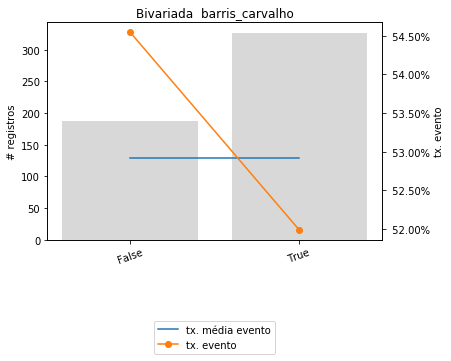

('barris_carvalho', 0.002, 1.016)

In [56]:
EDA.analise_cat_1(dataset1,'region', y = 'rating')